In [269]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# matplotlib.use('tkagg')
%matplotlib inline


## The library that I found from the internet.
# Y Data Profiling

In [224]:
from ydata_profiling import ProfileReport

df = pd.read_csv('heart.csv')
profile = ProfileReport(df, title="Profiling Report")
#profile


Additional variable descriptions to help us

age - age in years

sex - sex (1 = male; 0 = female)

cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

trtbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

ca - number of major vessels (0-3) colored by flourosopy

thal - 2 = normal; 1 = fixed defect; 3 = reversable defect

num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)

Import Data


In [225]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [226]:
# from collections import Counter
# Counter(df['output'])

In [227]:
# from collections import Counter

# # Example data
# data = np.array(df['output'])

# # Count occurrences using Counter
# counter = Counter(data)

# # Calculate probabilities
# total_count = len(data)
# probabilities = {key: count / total_count for key, count in counter.items()}

# print("Counts:", counter)
# print("Probabilities:", probabilities)

# Characteristic of data

In [228]:
# Display basic information about the DataFrame
print("Basic Information:")
print(df.info())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [229]:
# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std   

In [230]:
# Display the first few rows of the DataFrame
print("\nFirst Few Rows:")
print(df.head())


First Few Rows:
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [231]:
# Check for missing values in the DataFrame
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [232]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


In [233]:
# Display unique values in a specific column (e.g., 'target')
print("\nUnique Values in 'output' column:")
print(df['output'].unique())



Unique Values in 'output' column:
[1 0]


In [234]:
#check uniqe value in row 
df.apply(lambda x: len(x.unique()))

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

# Data cleansing 

In [235]:
# Fine missing values
df.dropna(inplace=True)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [236]:
df.duplicated().sum()

1

In [237]:
display(df.drop_duplicates(inplace=True)) 

None

# Data visualization

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

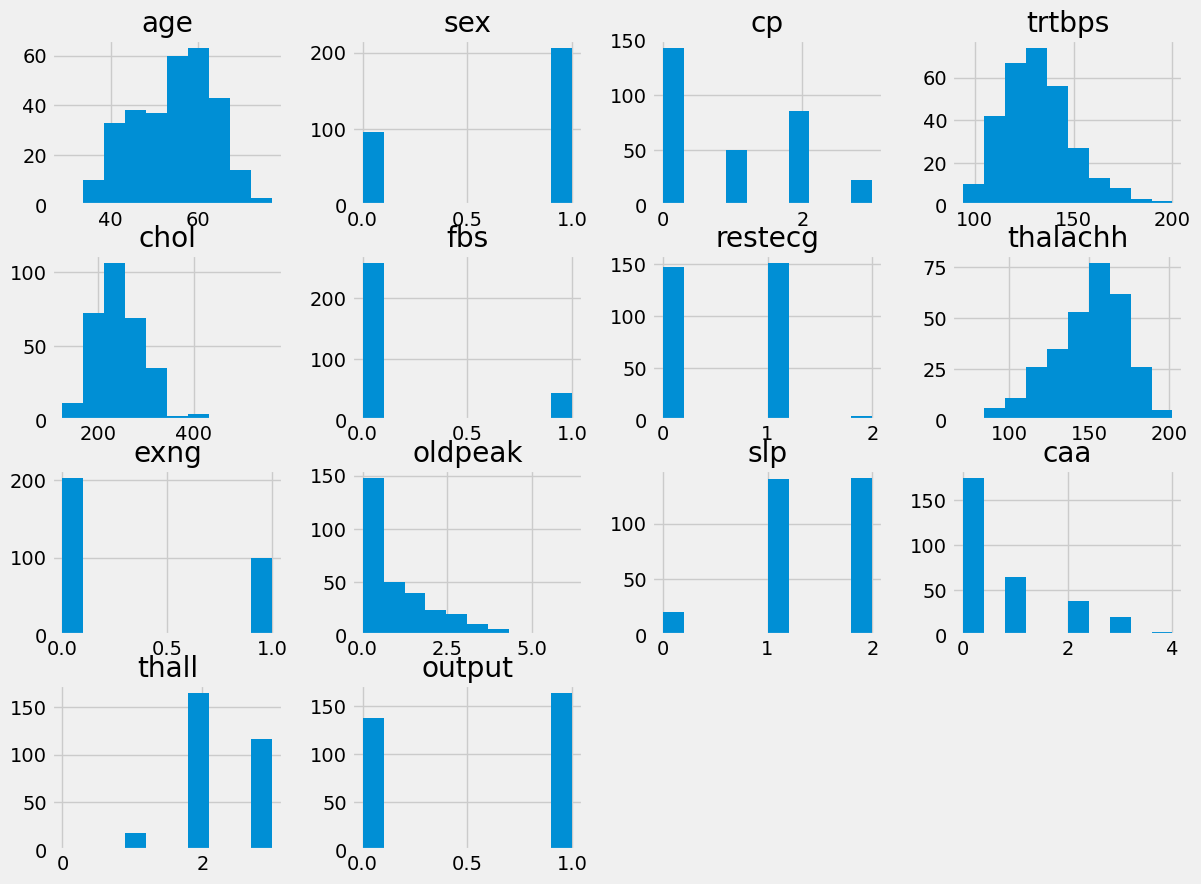

In [238]:
df.hist(figsize=(13,10))

Categorical Feature Analysis

In [239]:
#put together categorical features
categorical_features = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall", "output"]

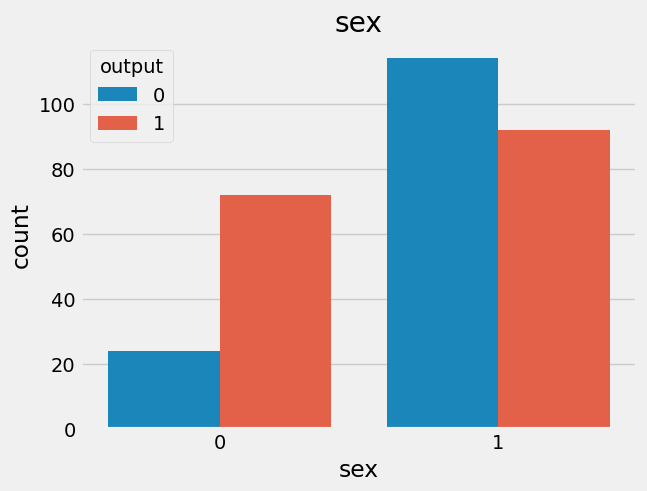

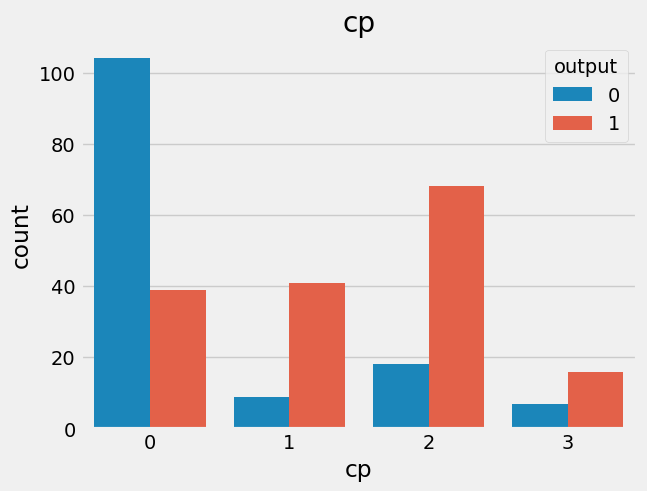

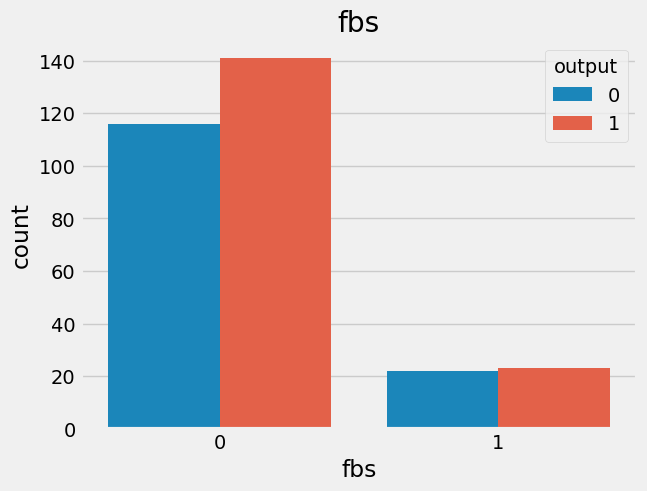

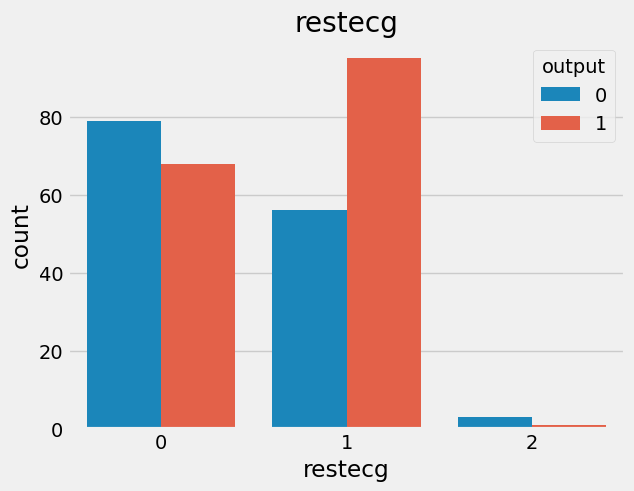

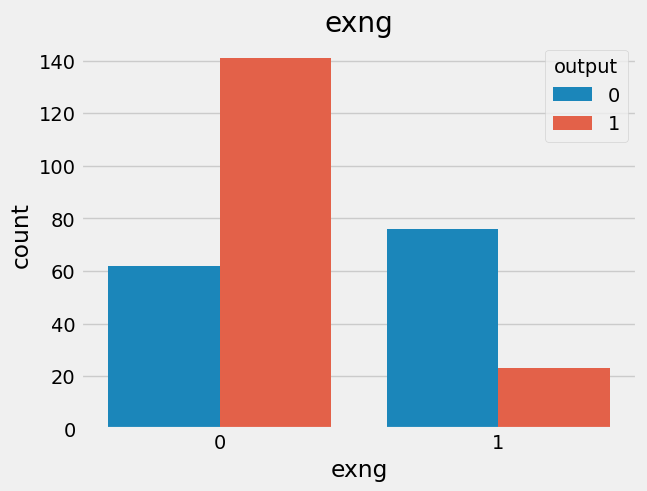

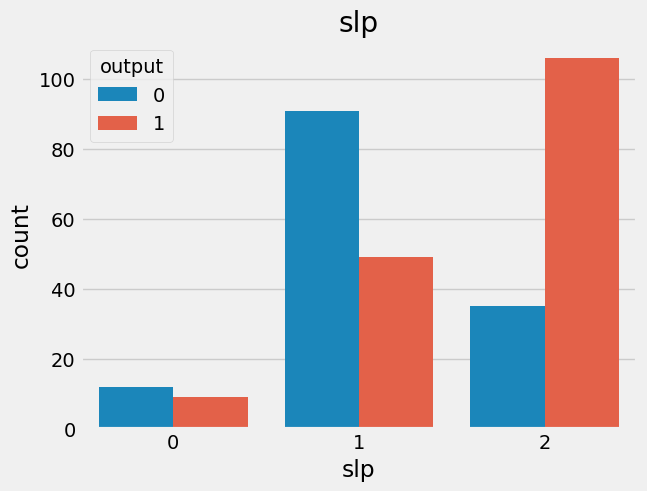

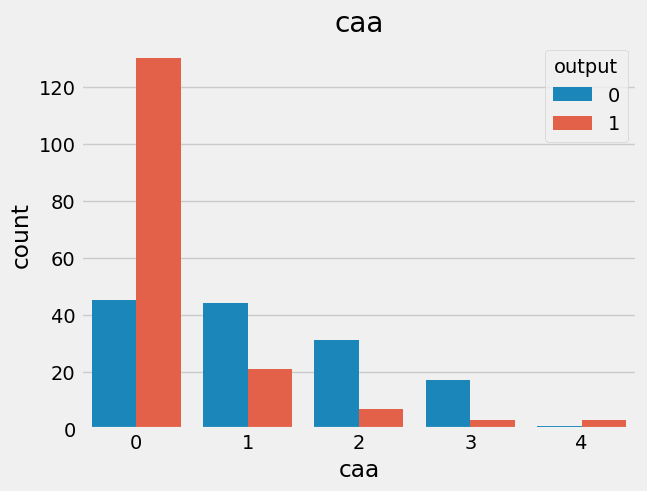

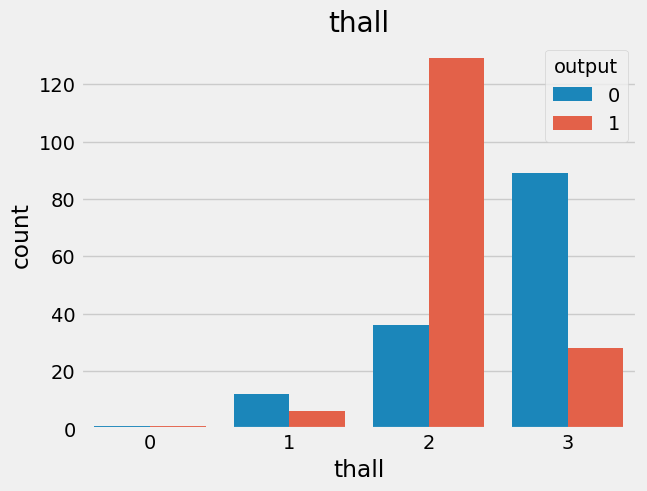

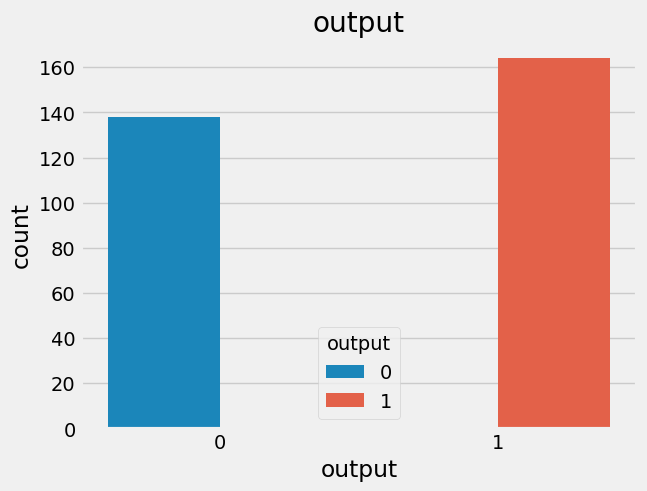

In [240]:
#visualization of selected features with countplot
df_categoric = df.loc[:, categorical_features]
for i in categorical_features:
    plt.figure()
    sns.countplot(x=i, data=df_categoric, hue= "output")
    plt.title(i)

The correlation plot of the heart attack prediction


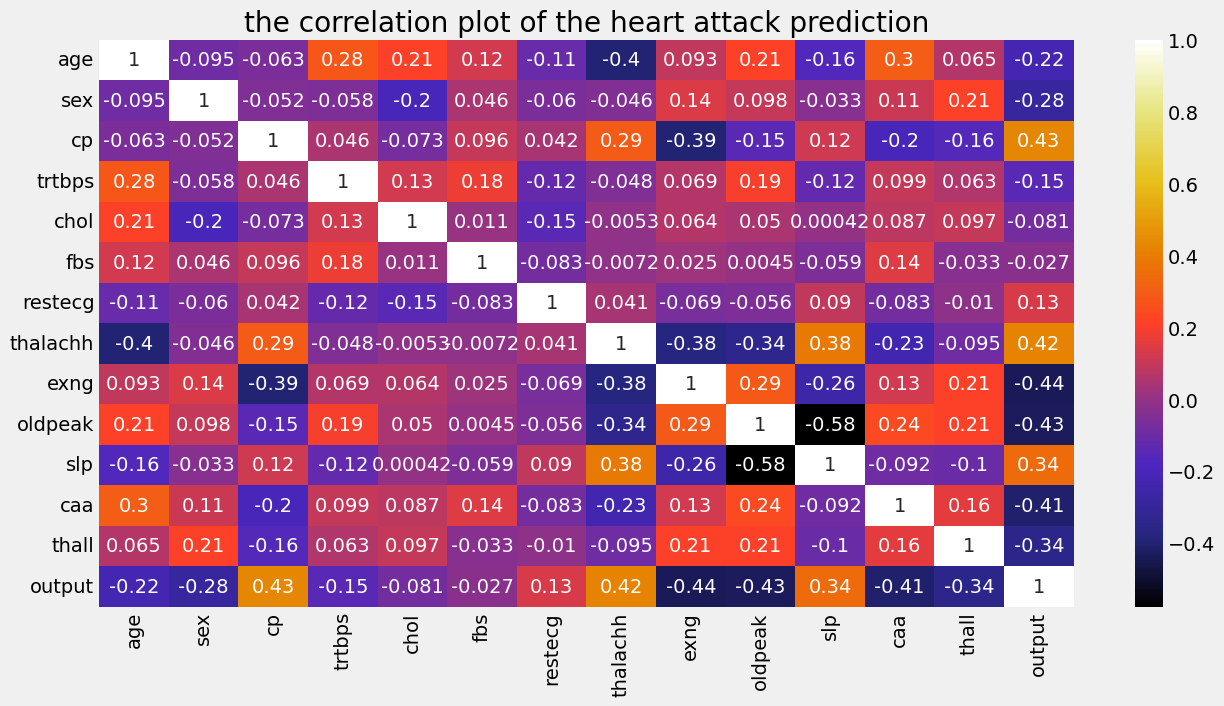

In [241]:
plt.figure(figsize=(14, 7))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True,)
plt.title("the correlation plot of the heart attack prediction")
plt.show()

Numeric Feature Analysis with scatter plot

In [242]:
#put together numeric features
numeric_features = ["age", "trtbps","chol","thalachh","oldpeak","output"]

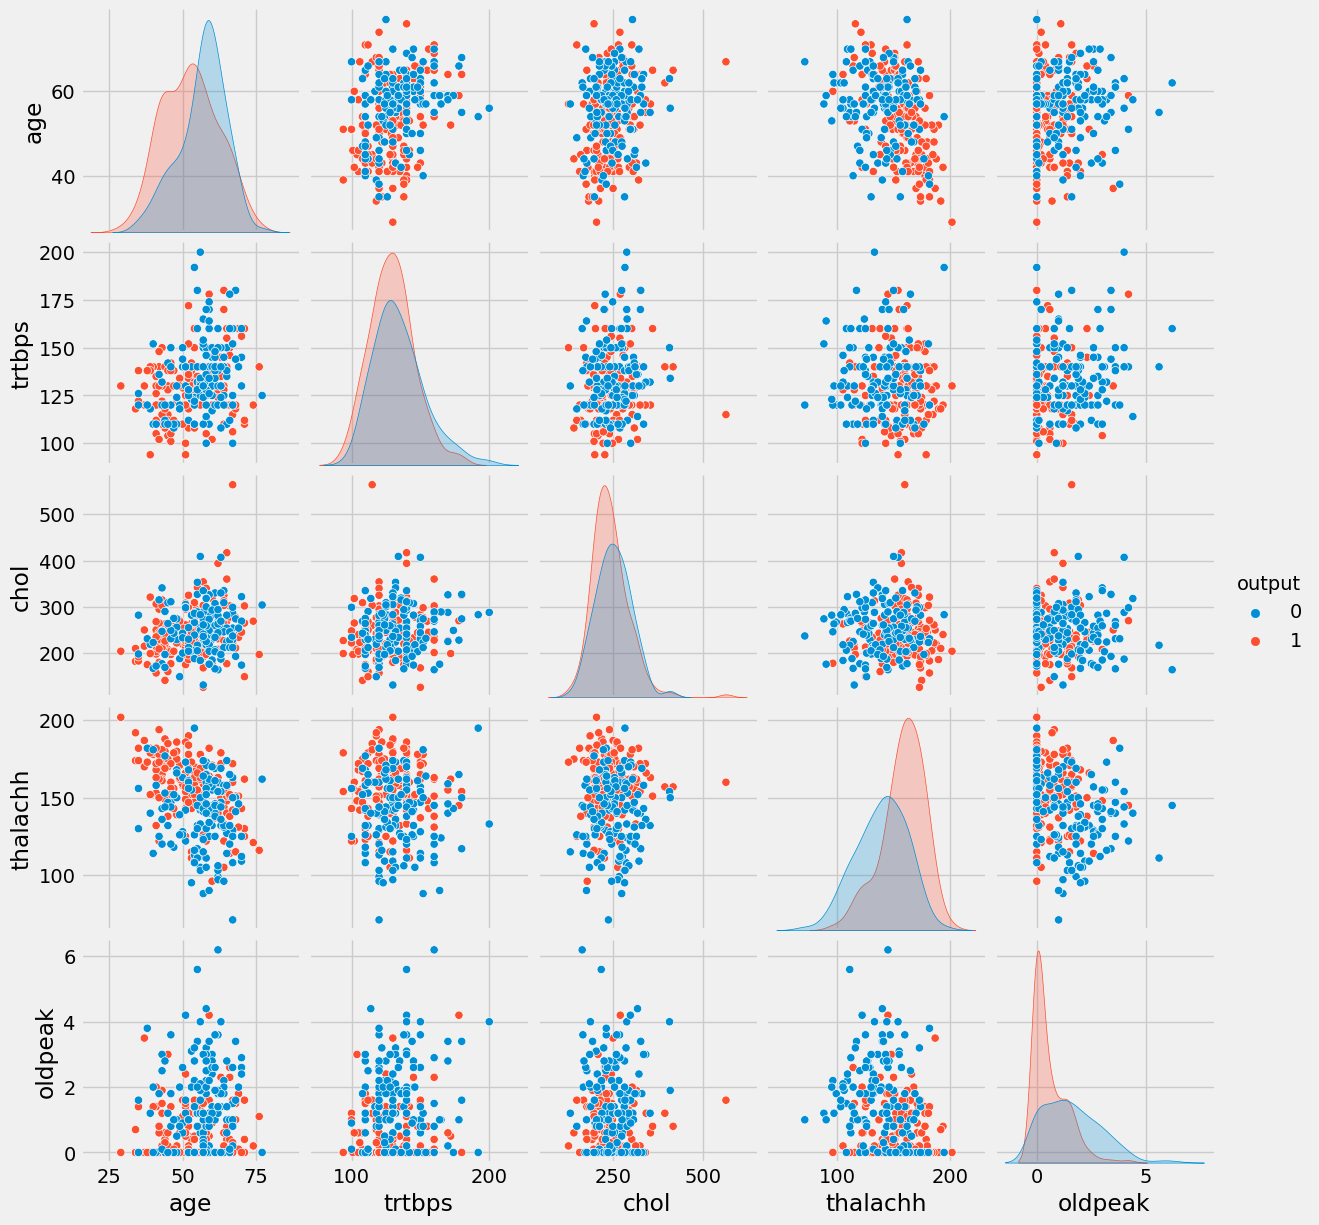

In [243]:
df_numeric = df.loc[:, numeric_features]
sns.pairplot(df_numeric, hue = "output", diag_kind = "kde")
plt.show()

Correlation of Age and Maximun Heart rate

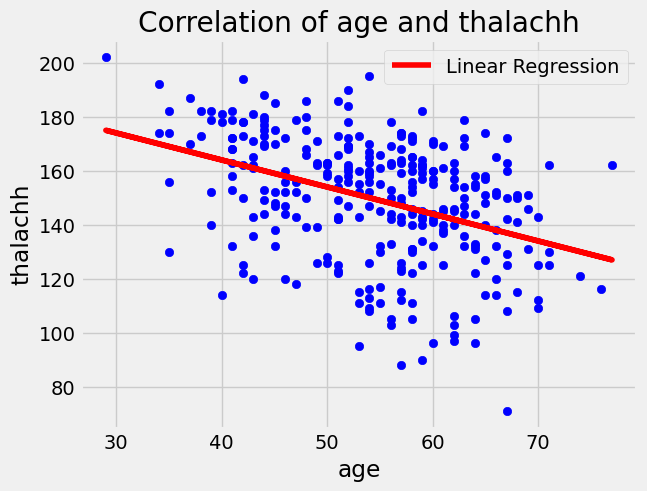

In [244]:

from sklearn.linear_model import LinearRegression
# Data
age = df['age']
thalachh = df['thalachh']

# Fit a linear regression line
model = LinearRegression()
X = age.values.reshape(-1, 1)
model.fit(X, thalachh)
y_pred = model.predict(X)

plt.plot(age, y_pred, color='red', label='Linear Regression')

# Plot
plt.scatter(age, thalachh, color='blue')
plt.title('Correlation of age and thalachh')
plt.xlabel('age')
plt.ylabel('thalachh')
plt.legend()
plt.show()



Average of age with Maximum heart rate

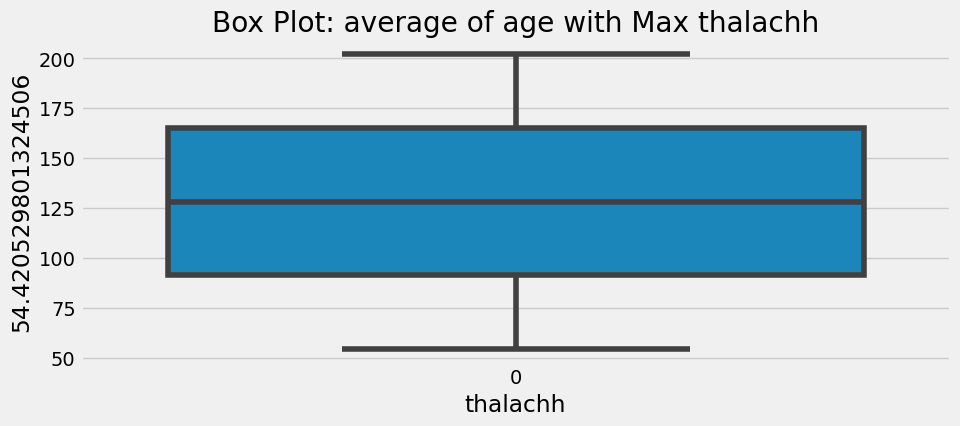

In [245]:

x = np.mean(df['age'])
y = np.max(df['thalachh'])
data=[x,y]
fig = plt.figure(figsize =(10, 4))
 
# Create a box plot
sns.boxplot(data)

plt.xlabel('thalachh')
plt.ylabel(x)
plt.title('Box Plot: average of age with Max thalachh')
plt.show()

Distribution of the resting blood pressure

In [246]:
import plotly.express as px
fig = px.box(df, y='trtbps', color='sex', title=f'distribution of the resting blood pressure')
fig.show()

# Modeling

Slitting dataset

In [247]:
# X represents the features (independent variables)
X = df.drop(['output'], axis=1)
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [248]:
# y represents the target variable (dependent variable)
y = df['output']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 302, dtype: int64

# Split Data to 30% Test and 70% Train

Using Logistic Regression Algorism

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [250]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

c:\Users\Thear Sithysak\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

Model prediction on Test Dataset (prediction)

In [251]:
y_pred = clf.predict(X_test)

In [252]:
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1], dtype=int64)

# Model Evaluation - Model performance

In [253]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(f"    Metrics - Confusion Matrix: \n", cm)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"    Metrics - Accuracy Score:       {accuracy}")

precision = metrics.precision_score(y_test, y_pred)
print(f"    Metrics - Precision Score:      {precision}")

recall = metrics.recall_score(y_test, y_pred)
print(f"    Metrics - Recall Score:         {recall}")

f1 = metrics.f1_score(y_test, y_pred)
print(f"    Metrics - F1-Score:             {f1}")

roc_auc = metrics.roc_auc_score(y_test, y_pred)
print(f"    Metrics - ROC AUC Score:        {roc_auc}")

    Metrics - Confusion Matrix: 
 [[34  8]
 [ 8 41]]
    Metrics - Accuracy Score:       0.8241758241758241
    Metrics - Precision Score:      0.8367346938775511
    Metrics - Recall Score:         0.8367346938775511
    Metrics - F1-Score:             0.8367346938775511
    Metrics - ROC AUC Score:        0.8231292517006803


Logistic Regression Hyperparameter Tuning

In [254]:
lr = LogisticRegression()
lr

LogisticRegression()

In [255]:
penalty = ["l1", "l2"]
parameters = {"penalty": penalty}

In [256]:
lr_searcher = GridSearchCV(lr, parameters)

In [264]:
lr_searcher.fit(X_train, y_train)

c:\Users\Thear Sithysak\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\Thear Sithysak\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\Thear Sithysak\

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2']})

In [265]:
print("Best parameters: ",lr_searcher.best_params_)

Best parameters:  {'penalty': 'l2'}


In [266]:
y_pred = lr_searcher.predict(X_test)

In [270]:
print("Test accuracy: {}".format(accuracy_score(y_pred, y_test)))

Test accuracy: 0.8241758241758241


Using Decision Tree Classifier


Split X & Y

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

Model Prediction 

In [259]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1], dtype=int64)

Model Evaluation

In [260]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(f"    Metrics - Confusion Matrix: \n", cm)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"    Metrics - Accuracy Score:       {accuracy}")

precision = metrics.precision_score(y_test, y_pred)
print(f"    Metrics - Precision Score:      {precision}")

recall = metrics.recall_score(y_test, y_pred)
print(f"    Metrics - Recall Score:         {recall}")

f1 = metrics.f1_score(y_test, y_pred)
print(f"    Metrics - F1-Score:             {f1}")

roc_auc = metrics.roc_auc_score(y_test, y_pred)
print(f"    Metrics - ROC AUC Score:        {roc_auc}")

    Metrics - Confusion Matrix: 
 [[35  7]
 [11 38]]
    Metrics - Accuracy Score:       0.8021978021978022
    Metrics - Precision Score:      0.8444444444444444
    Metrics - Recall Score:         0.7755102040816326
    Metrics - F1-Score:             0.8085106382978723
    Metrics - ROC AUC Score:        0.8044217687074829


Use Random Forest Classifier model

In [261]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Assuming X and y are your feature matrix and target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Change the classifier to RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Assuming y_pred is the predictions made by the model
y_pred = clf.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)
print(f"    Metrics - Confusion Matrix: \n", cm)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"    Metrics - Accuracy Score:       {accuracy}")

precision = metrics.precision_score(y_test, y_pred)
print(f"    Metrics - Precision Score:      {precision}")

recall = metrics.recall_score(y_test, y_pred)
print(f"    Metrics - Recall Score:         {recall}")

f1 = metrics.f1_score(y_test, y_pred)
print(f"    Metrics - F1-Score:             {f1}")

roc_auc = metrics.roc_auc_score(y_test, y_pred)
print(f"    Metrics - ROC AUC Score:        {roc_auc}")


    Metrics - Confusion Matrix: 
 [[35  7]
 [ 8 41]]
    Metrics - Accuracy Score:       0.8351648351648352
    Metrics - Precision Score:      0.8541666666666666
    Metrics - Recall Score:         0.8367346938775511
    Metrics - F1-Score:             0.845360824742268
    Metrics - ROC AUC Score:        0.8350340136054423


Use Support Vector Machine model

In [262]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

# Assuming X and y are your feature matrix and target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Change the classifier to Support Vector Machine (SVM)
clf = SVC()
clf.fit(X_train, y_train)

# Assuming y_pred is the predictions made by the model
y_pred = clf.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)
print(f"    Metrics - Confusion Matrix: \n", cm)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"    Metrics - Accuracy Score:       {accuracy}")

precision = metrics.precision_score(y_test, y_pred)
print(f"    Metrics - Precision Score:      {precision}")

recall = metrics.recall_score(y_test, y_pred)
print(f"    Metrics - Recall Score:         {recall}")

f1 = metrics.f1_score(y_test, y_pred)
print(f"    Metrics - F1-Score:             {f1}")

roc_auc = metrics.roc_auc_score(y_test, y_pred)
print(f"    Metrics - ROC AUC Score:        {roc_auc}")


    Metrics - Confusion Matrix: 
 [[23 19]
 [ 7 42]]
    Metrics - Accuracy Score:       0.7142857142857143
    Metrics - Precision Score:      0.6885245901639344
    Metrics - Recall Score:         0.8571428571428571
    Metrics - F1-Score:             0.7636363636363637
    Metrics - ROC AUC Score:        0.7023809523809524


In [263]:
#input the example of data 
input_data = (60,0,0,150,258,0,0,157,0,2.6,1,2,3)

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] ==0):
    print('The person does not have a heart diseases.')
else:
    print ('The person has heart diseases.')
          

[0.]
The person does not have a heart diseases.


c:\Users\Thear Sithysak\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names

